In [8]:
import os, signal, sys, time
from ai_economist import foundation
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
from utils import plotting
os.chdir(os.path.dirname(os.path.abspath("__file__")))
'''
地图的设计：替换掉my_map.txt
规则的设计：替换掉layout_from_file

'''
env_config = {
    'scenario_name': 'layout_from_file/simple_wood_and_stone',
    'components': [
        ('Build', {'skill_dist': "pareto", 'payment_max_skill_multiplier': 3}),
        ('ContinuousDoubleAuction', {'max_num_orders': 5}),
        ('Gather', {}),
    ],   
    'env_layout_file': 'my_map_sperate.txt',
    'starting_agent_coin': 10,
    'fixed_four_skill_and_loc': False,    
    'n_agents': 3,          
    'world_size': [15, 10], 
    'episode_length': 1000,     
    'multi_action_mode_agents': False,
    'multi_action_mode_planner': True,
    'flatten_observations': False,
    'flatten_masks': True,
}
env = foundation.make_env_instance(**env_config)


In [9]:
def sample_random_action(agent, mask):
    if agent.multi_action_mode:
        split_masks = np.split(mask, agent.action_spaces.cumsum()[:-1])
        return [np.random.choice(np.arange(len(m_)), p=m_/m_.sum()) for m_ in split_masks]
    else:
        return np.random.choice(np.arange(agent.action_spaces), p=mask/mask.sum())

def sample_random_actions(env, obs):       
    actions = {
        a_idx: sample_random_action(env.get_agent(a_idx), a_obs['action_mask'])
        for a_idx, a_obs in obs.items()
    }
    return actions

obs = env.reset()
actions = sample_random_actions(env, obs)
obs, rew, done, info = env.step(actions)
print(env.get_agent(0).__dict__['state']['build_skill'])
# print(env.get_agent(0).__dict__['state']['build_payment'])
print(env.get_agent(1).__dict__['state']['build_skill'])
# print(env.get_agent(1).__dict__['state']['build_payment'])
print(env.get_agent(2).__dict__['state']['build_skill'])
# print(env.get_agent(2).__dict__['state']['build_payment'])


0.24382103859871718
0.22327148557591636
0.20524073123831088


In [10]:
def do_plot(env, ax, fig):
    plotting.plot_env_state(env, ax)
    ax.set_aspect('equal')
    display.display(fig)
    display.clear_output(wait=True)

def play_random_episode(env, plot_every=10, do_dense_logging=False):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    obs = env.reset(force_dense_logging=do_dense_logging)
    for t in range(env.episode_length):
        actions = sample_random_actions(env, obs)
        obs, rew, done, info = env.step(actions)
        if ((t+1) % plot_every) == 0:
            do_plot(env, ax, fig)
    if ((t+1) % plot_every) != 0:
        do_plot(env, ax, fig) 

obs = env.reset(force_dense_logging=False)
for t in range(env.episode_length):
    actions = sample_random_actions(env, obs)
    obs, rew, done, info = env.step(actions)
    print(rew)

{'0': -0.05250000000000021, '1': -0.05250000000000021, '2': -0.05250000000000021, 'p': 0.0}
{'0': -0.20999999999999996, '1': -0.05250000000000021, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.05250000000000021, '1': -0.052499999999999325, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.052499999999999325, '1': -0.05250000000000021, '2': -0.05250000000000021, 'p': 0.0}
{'0': -0.05250000000000021, '1': -0.05250000000000021, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.05250000000000021, '1': 0.0, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.20999999999999996, '1': 0.0, '2': -0.20999999999999996, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.05250000000000021, '1': 0.0, '2': -0.05250000000000021, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.20999999999999908, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999996, '1': -0.41999999999999993, '2': 0.0, 'p': 0.0}
{'0': -0.052499999999999325, '1': -0.20999999999999996, '2': -0.

{'0': -0.20999999999999908, '1': -0.05250000000000021, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999908, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999908, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999908, '2': -0.2099999999999973, 'p': 0.0}
{'0': -0.20999999999999908, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.20999999999999908, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05249999999999844, '1': -0.05250000000000021, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': -0.2099999999999973, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999908, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': 0.0, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05249999999999844, '1': -0.41999999999999993, '2': -0.2099999999999973, 'p': 0.0}
{'0': -1.0215291750134021

{'0': -0.05250000000000199, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.20999999999999375, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': -0.052499999999994884, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1': 0.0, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -1.3321118260350922, '1': 0.9764175757653746, '2': -0.21000000000000085, 'p': -0.6666666666662957}
{'0': -0.05250000000000199, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': -0.2099999999999973, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.21000000000000085, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999375, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.2099999999999973,

{'0': -0.05250000000000199, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.05250000000000199, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999375, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.05250000000000199, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999375, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1':

{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.052500000000009095, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.4200000000000017, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1

{'0': 0.0, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': -0.052500000000009095, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.20999999999999375, '2': -0.052500000000009095, 'p': 0.0}
{'0': 0.5434095517056932, '1': -0.7277474508476729, '2': -0.20999999999999375, 'p': 0.3333333333331474}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.2100000000000

{'0': 0.0, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052500000000009095, '1': 0.48814192106389953, '2': -0.839255549999848, 'p': -0.6666666666662948}
{'0': 0.0, '1': -0.05249999999998067, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.052500000000009095, 'p': 0.0}
{'0': -0.20999999999999375, '1': -1.3002477567171127, '2': 1.188126198034368, 'p': 0.999999999999444}
{'0': -0.052500000000009095, '1': 1.037747756717124, '2': -1.2931261980343578, 'p': -0.999999999999444}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.052500000000009095, '1': -2.272441813341615, '2': 2.366370798724205, 'p': 1.6666666666657406}
{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.052499999999994884, 'p': 0.0}
{'0': -0.20999999999999375, '1': 2.1674418133416253, '2': -2.471370798724209, 'p': -1.6666666666657406}
{'0': -0.21000000000000796, '1': -1.1427477567171138, '2': 1.1881261

{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.05249999999998067, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.052499999999994884, '2': -0.052500000000009095, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.20999999999999375, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': 0.0, '2': -0.20999999999997954, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.052499999999994884, '2': 0.0, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.20999999999999375, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.20999999999997954, 'p': 0.0}
{'0': -0.20999999999999375, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.052500000000009095, '1': -0.20999999999999375, '2': -0.2

{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.20999999999997954, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.20999999999997954, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999997954, '1': -0.20999999999997954, '2': -0.05249999999998067, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.05249999999998067, '1': 0.0, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052500000000009095, '1': -0.21000000000000796, '2': -0.05249999999998067, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.052500000000009095, '1': 0.0, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999997954, '1

_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :   5.88 (n= 32) |   6.16 (n= 57) |   6.43 (n= 49)
Cost (Stone)   :   5.50 (n= 50) |   5.78 (n= 50) |   5.69 (n= 54)

Income (Wood)  :   6.23 (n= 31) |   6.21 (n= 43) |   6.16 (n= 64)
Income (Stone) :   5.57 (n= 47) |   5.59 (n= 63) |   5.84 (n= 44)
Income (Build) :  13.12 (n=  1) |  11.11 (n= 14) |  19.09 (n=  9)


((<Figure size 1152x216 with 5 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x576 with 6 Axes>),
 {'Sell Stone': [262, 352, 257],
  'Buy Stone': [-275, -289, -307],
  'Sell Wood': [193, 267, 394],
  'Buy Wood': [-188, -351, -315],
  'Build': [13.115543999678628, 155.47686718114167, 171.77981430625312],
  'Total': array([  5.115544  , 134.47686718, 200.77981431])},
 [15, 144, 210],
 {'Stone': [{'t': 56,
    't_ask': 56,
    't_bid': 6,
    'commodity': 'Stone',
    'buyer': 0,
    'bid': 0,
    'bid_lifetime': 50,
    'seller': 1,
    'ask': 0,
    'ask_lifetime': 0,
    'price': 0,
    'cost': 0,
    'income': 0},
   {'t': 71,
    't_ask': 58,
    't_bid': 71,
    'commodity': 'Stone',
    'buyer': 2,
    'bid': 8,
    'bid_lifetime': 0,
    'seller': 1,
    'ask': 3,
    'ask_lifetime': 13,
    'price': 3,
    'cost': 3,
    'income': 3},
   {'t': 72,
    't_ask': 72,
    't_bid': 57,
    'commodity': 'Stone',
    'buyer': 1,
    'bid': 8,
    'bid_lifetime': 15,
   

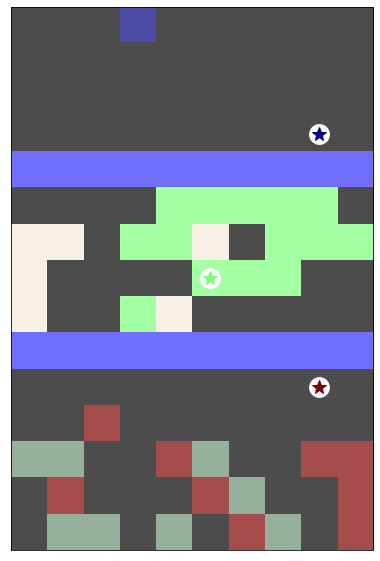

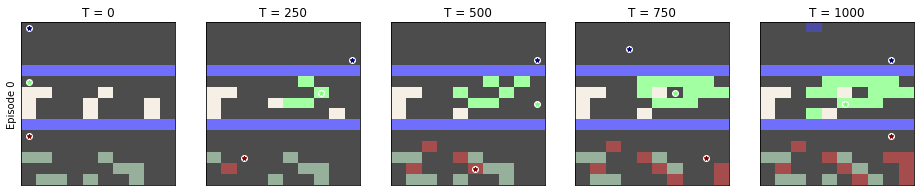

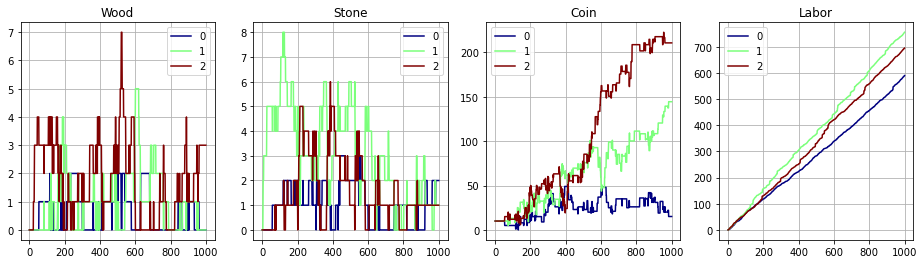

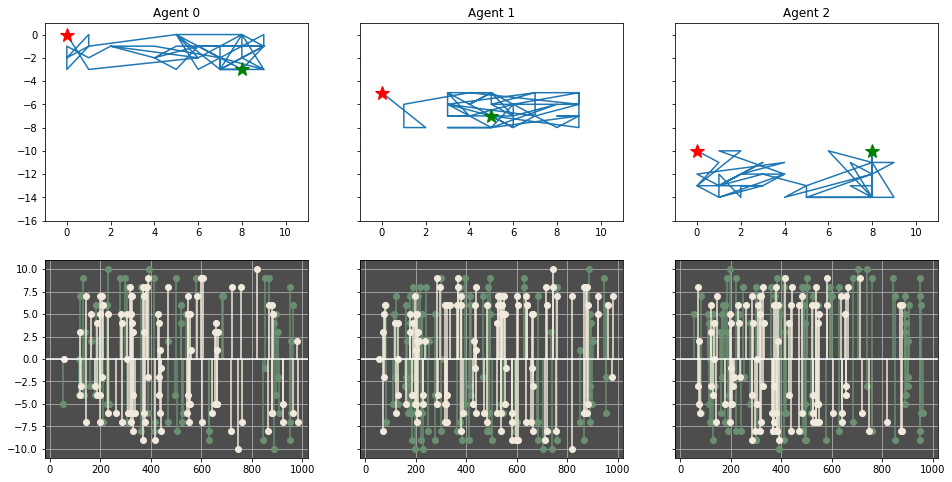

In [206]:
play_random_episode(env, plot_every=10, do_dense_logging=True)
dense_log = env.previous_episode_dense_log
plotting.breakdown(dense_log)

In [14]:
print(env.get_agent(0).__dict__['state']['build_payment'])

print(env.get_agent(1).__dict__['state']['build_payment'])

print(env.get_agent(2).__dict__['state']['build_payment'])

20.28585420491971
11.086067971880627
13.020654126834309


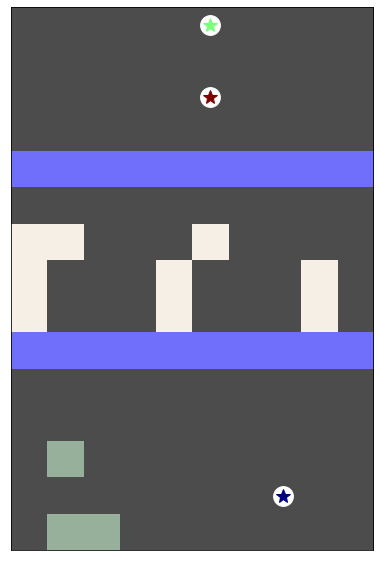

In [15]:
play_random_episode(env, plot_every=10, do_dense_logging=True)
dense_log = env.previous_episode_dense_log


_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :   2.12 (n= 26) |   1.78 (n= 27) |   1.54 (n= 28)
Cost (Stone)   :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   

Income (Wood)  :   1.73 (n= 33) |   1.95 (n= 22) |   1.77 (n= 26)
Income (Stone) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Income (Build) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   


((<Figure size 1152x216 with 5 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x576 with 6 Axes>),
 {'Sell Stone': [0, 0, 0],
  'Buy Stone': [0, 0, 0],
  'Sell Wood': [57, 43, 46],
  'Buy Wood': [-55, -48, -43],
  'Build': [0, 0, 0],
  'Total': array([ 2, -5,  3])},
 [12, 5, 13],
 {'Stone': [],
  'Wood': [{'t': 7,
    't_ask': 7,
    't_bid': 0,
    'commodity': 'Wood',
    'buyer': 1,
    'bid': 10,
    'bid_lifetime': 7,
    'seller': 0,
    'ask': 10,
    'ask_lifetime': 0,
    'price': 10,
    'cost': 10,
    'income': 10},
   {'t': 102,
    't_ask': 102,
    't_bid': 61,
    'commodity': 'Wood',
    'buyer': 2,
    'bid': 1,
    'bid_lifetime': 41,
    'seller': 0,
    'ask': 1,
    'ask_lifetime': 0,
    'price': 1,
    'cost': 1,
    'income': 1},
   {'t': 110,
    't_ask': 110,
    't_bid': 103,
    'commodity': 'Wood',
    'buyer': 2,
    'bid': 5,
    'bid_lifetime': 7,
    'seller': 1,
    'ask': 1,
    'ask_lifetime': 0,
    'price': 5,
    'cost': 5,
    'i

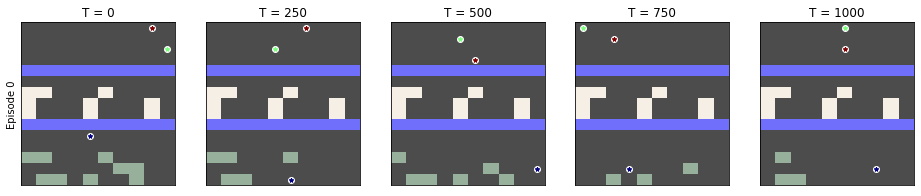

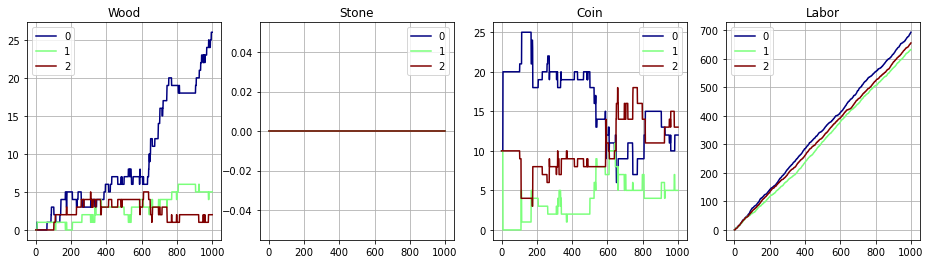

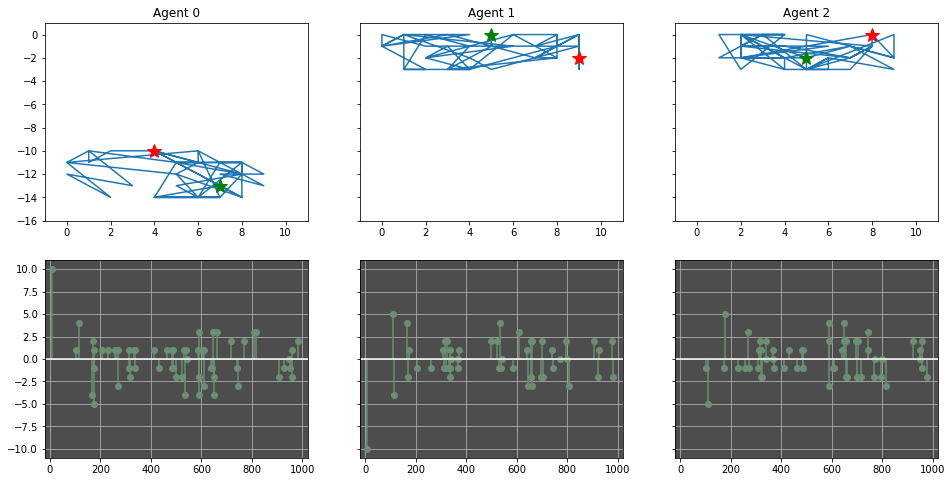

In [16]:
plotting.breakdown(dense_log)

In [17]:
for agent_idx, reward in rew.items(): 
    print("{:2} {:.3f}".format(agent_idx, reward))

0  -0.053
1  -0.053
2  0.000
p  0.000


In [190]:
from ai_economist.foundation.base.base_env import BaseEnvironment, scenario_registry
from ai_economist.foundation.scenarios.simple_wood_and_stone.layout_from_file import LayoutFromFile
@scenario_registry.add
class MyTest(LayoutFromFile):
    name ="mytest"
    def __init__(self,*base_env_args,**base_env_kwargs):
        super().__init__(*base_env_args, **base_env_kwargs)
        self.env_layout_file="my_map_sperate.txt"

    def reset_agent_states(self):
        self.world.clear_agent_locs()
        for agent in self.world.agents:
            # Clear everything to start with
            agent.state["inventory"] = {k: 0 for k in agent.inventory.keys()}
            agent.state["escrow"] = {k: 0 for k in agent.inventory.keys()}
            agent.state["endogenous"] = {k: 0 for k in agent.endogenous.keys()}
            # Add starting coin
            agent.state["inventory"]["Coin"] = float(self.starting_agent_coin)

        # Clear everything for the planner
        self.world.planner.state["inventory"] = {
            k: 0 for k in self.world.planner.inventory.keys()
        }
        self.world.planner.state["escrow"] = {
            k: 0 for k in self.world.planner.escrow.keys()
        }

        # Place the agents randomly in the world
#         if len(self.world.agents)==3:
        self.world.set_agent_loc(self.world.agents[0], 0, 0)
        self.world.set_agent_loc(self.world.agents[1], 5, 0)
        self.world.set_agent_loc(self.world.agents[2], 10, 0)

In [191]:
env_config = {
    'scenario_name': 'mytest',
    'components': [
        ('Build', {'skill_dist': "pareto", 'payment_max_skill_multiplier': 3}),
        ('ContinuousDoubleAuction', {'max_num_orders': 5}),
        ('Gather', {}),
    ],   
    'env_layout_file': 'my_map_sperate.txt',
    'starting_agent_coin': 10,
    'fixed_four_skill_and_loc': False,    
    'n_agents': 3,          
    'world_size': [15, 10], 
    'episode_length': 1000,     
    'multi_action_mode_agents': False,
    'multi_action_mode_planner': True,
    'flatten_observations': False,
    'flatten_masks': True,
}
env = foundation.make_env_instance(**env_config)

In [192]:
obs = env.reset()

def sample_random_action(agent, mask):
    if agent.multi_action_mode:
        split_masks = np.split(mask, agent.action_spaces.cumsum()[:-1])
        return [np.random.choice(np.arange(len(m_)), p=m_/m_.sum()) for m_ in split_masks]
    else:
        return np.random.choice(np.arange(agent.action_spaces), p=mask/mask.sum())

def sample_random_actions(env, obs):       
    actions = {
        a_idx: sample_random_action(env.get_agent(a_idx), a_obs['action_mask'])
        for a_idx, a_obs in obs.items()
    }
    return actions



# actions = sample_random_actions(env, obs)
# obs, rew, done, info = env.step(actions)

# agent = env.get_agent(0)
# print(env.get_agent(0).state['loc'])
# print(env.get_agent(1).state['loc'])
# print(env.get_agent(2).state['loc'])
# for agent in env.world.agents:
#     print(env.world.agents[0].__dict__)


# print(env.__dict__.keys())

_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :   6.48 (n= 25) |   6.87 (n= 47) |   6.38 (n= 29)
Cost (Stone)   :   5.22 (n= 50) |   5.40 (n= 52) |   5.36 (n= 72)

Income (Wood)  :   7.63 (n= 19) |   6.15 (n= 33) |   6.57 (n= 49)
Income (Stone) :   5.58 (n= 43) |   5.18 (n= 79) |   5.37 (n= 52)
Income (Build) :  11.29 (n=  6) |  17.35 (n= 11) |  16.35 (n= 15)


((<Figure size 1152x216 with 5 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x576 with 6 Axes>),
 {'Sell Stone': [240, 409, 279],
  'Buy Stone': [-261, -281, -386],
  'Sell Wood': [145, 203, 322],
  'Buy Wood': [-162, -323, -185],
  'Build': [67.74318548298262, 190.87129355797197, 245.24404357469788],
  'Total': array([ 29.74318548, 198.87129356, 275.24404357])},
 [39, 208, 285],
 {'Stone': [{'t': 7,
    't_ask': 7,
    't_bid': 1,
    'commodity': 'Stone',
    'buyer': 2,
    'bid': 4,
    'bid_lifetime': 6,
    'seller': 1,
    'ask': 2,
    'ask_lifetime': 0,
    'price': 4,
    'cost': 4,
    'income': 4},
   {'t': 8,
    't_ask': 8,
    't_bid': 2,
    'commodity': 'Stone',
    'buyer': 1,
    'bid': 6,
    'bid_lifetime': 6,
    'seller': 2,
    'ask': 0,
    'ask_lifetime': 0,
    'price': 6,
    'cost': 6,
    'income': 6},
   {'t': 16,
    't_ask': 16,
    't_bid': 2,
    'commodity': 'Stone',
    'buyer': 0,
    'bid': 2,
    'bid_lifetime': 14,
    'seller'

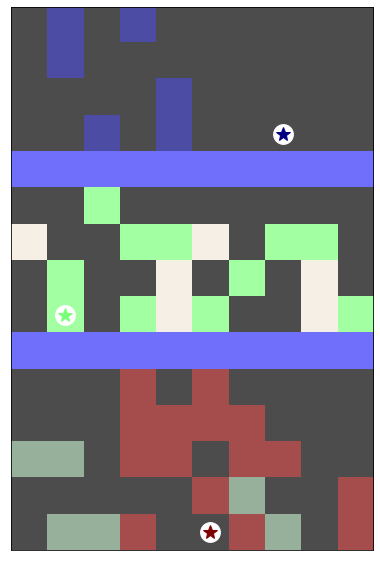

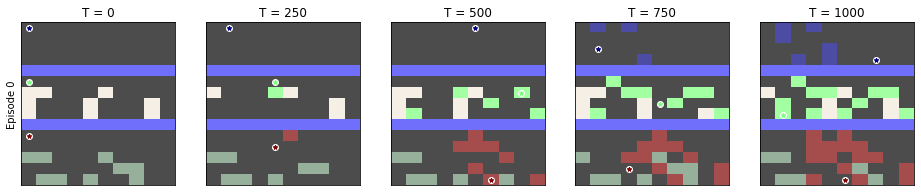

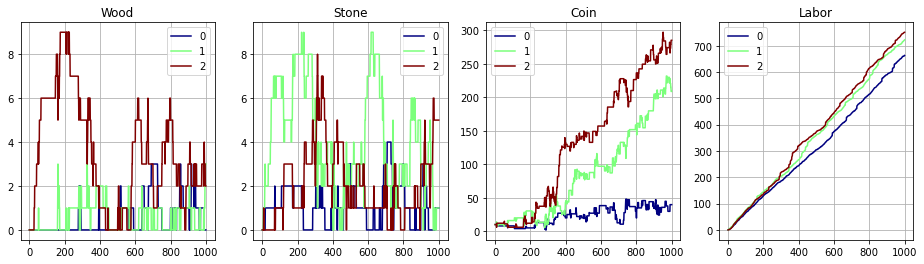

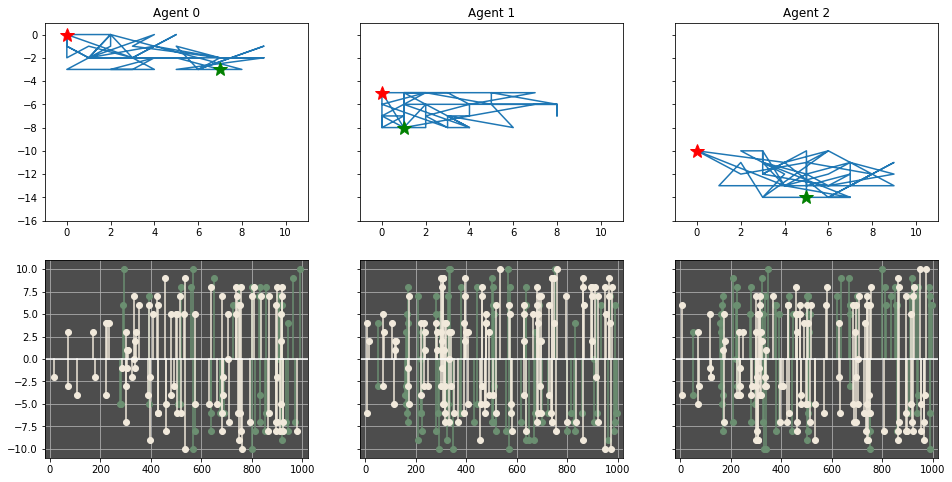

In [194]:
obs = env.reset()

play_random_episode(env, plot_every=10, do_dense_logging=True)
dense_log = env.previous_episode_dense_log
plotting.breakdown(dense_log)

(15, 10)
['Stone', 'Wood', 'House', 'Water']
[[0, 0], [5, 0], [10, 0]]
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.19607843 0.19607843 0.19607843 0.19607843 0.19607843 0.19607843
   0.19607843 0.19607843 0.19607843 0.19607843]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.

[]

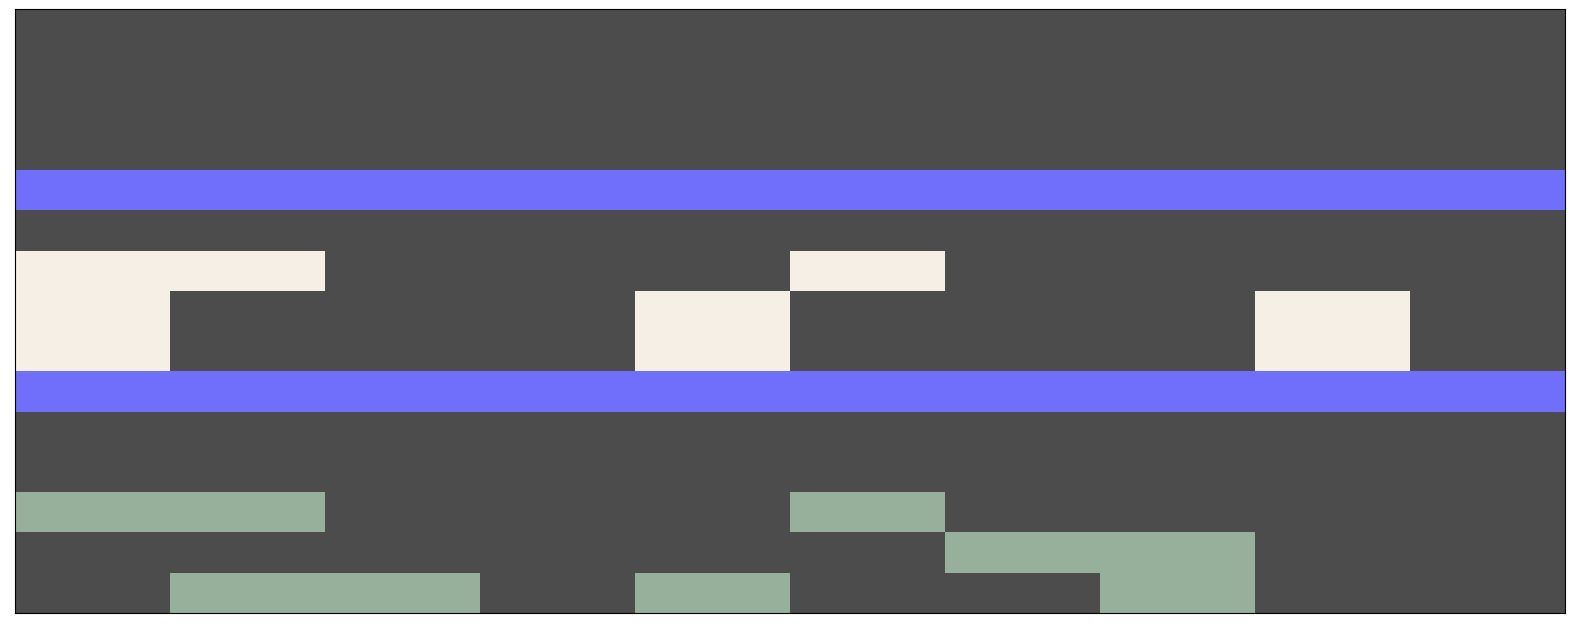

In [228]:
from utils import plotting
max_health = {"Wood": 1, "Stone": 1, "House": 1}
env.reset()
print(env.world.maps.get("Wood").shape)

scenario_entities = [k for k in env.world.maps.keys() if "source" not in k.lower()]
print(scenario_entities)

# plotting.plot_env_state(env)
locs = [agent.loc for agent in env.world.agents]
print(locs)

from ai_economist.foundation import landmarks, resources
maps = env.world.maps
world_size = np.array(maps.get("Wood")).shape
tmp = np.zeros((3, world_size[0], world_size[1]))


for entity in scenario_entities:
    if entity == "House":
        continue
    elif resources.has(entity):
        if resources.get(entity).collectible:
            map_ = (resources.get(entity).color[:, None, None]* np.array(maps.get(entity))[None])
            map_ /= max_health[entity]
            tmp += map_
    elif landmarks.has(entity):
        map_ = (landmarks.get(entity).color[:, None, None]* np.array(maps.get(entity))[None])
        tmp += map_
    else:
        continue

n_agents = len(locs)
cmap = plt.get_cmap("jet", n_agents)
cmap_order = list(range(n_agents))

if isinstance(maps, dict):
    house_idx = np.array(maps.get("House")["owner"])
    house_health = np.array(maps.get("House")["health"])
else:
    house_idx = maps.get("House", owner=True)
    house_health = maps.get("House")
for i in range(n_agents):
    houses = house_health * (house_idx == cmap_order[i])
    agent = np.zeros_like(houses)
    agent += houses
    col = np.array(cmap(i)[:3])
    map_ = col[:, None, None] * agent[None]
    tmp += map_

tmp *= 0.7
tmp += 0.3

tmp = np.transpose(tmp, [1, 2, 0])
tmp = np.minimum(tmp, 1.0)

fig = plt.figure(figsize=(20,8),dpi=100)
ax = fig.add_subplot(111)  
ax.imshow(tmp, vmax=1.0, aspect="auto")
ax.set_xticks([])
ax.set_yticks([])